In this example, we look at a time series of the log daily page views for the Wikipedia page for [Peyton Manning](https://en.wikipedia.org/wiki/Peyton_Manning). 

This dataset is a nice example because it illustrates some of Prophet’s features, like multiple seasonality, changing growth rates, and the ability to model special days (such as Manning’s playoff and superbowl appearances). 

The input to Prophet is always a dataframe with two columns: `ds` and `y`. The ds (datestamp) column should be of a format expected by Pandas, ideally `YYYY-MM-DD` for a date or `YYYY-MM-DD HH:MM:SS` for a timestamp. The `y` column must be numeric, and represents the measurement we wish to forecast.

In this notebook, we fit a default Prophet model that includes these components: trend, weekly seasonality, and yearly seasonality.

### Reference:
- https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

/Users/marianfarah/miniconda3/envs/timeseries11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load and inpsect the time series data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2905 non-null   datetime64[ns]
 1   y       2905 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.5 KB


In [3]:
df.head()

ds         y
0 2007-12-10  9.590761
1 2007-12-11  8.519590
2 2007-12-12  8.183677
3 2007-12-13  8.072467
4 2007-12-14  7.893572

In [4]:
df.tail()

ds          y
2900 2016-01-16   7.817223
2901 2016-01-17   9.273878
2902 2016-01-18  10.333775
2903 2016-01-19   9.125871
2904 2016-01-20   8.891374

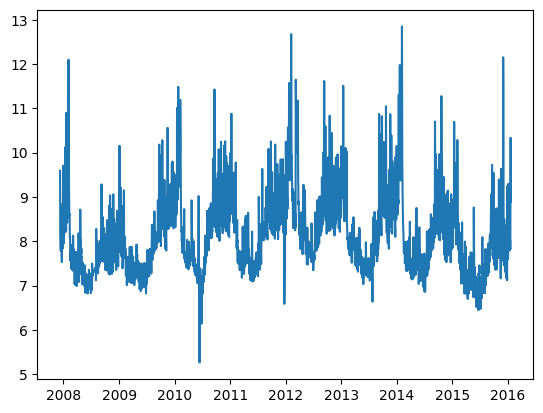

In [5]:
plt.plot(df['ds'], df['y']);

## Prophit for fitting and forecasting

In [6]:
# Instantiate a new Prophet object
m = Prophet()
# Call the fit method and pass the historical dataframe
m.fit(df)

16:43:40 - cmdstanpy - INFO - Chain [1] start processing
16:43:41 - cmdstanpy - INFO - Chain [1] done processing


Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made

You can get a suitable dataframe that extends into the future a specified number of days using the helper method `Prophet.make_future_dataframe`. By default it will also include the dates from the history, so we will see the model fit as well.


In [7]:
future = m.make_future_dataframe(periods=365)
print(len(future))
future.tail()

3270


ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

The `predict` method will assign each row in `future` a predicted value which it names `yhat`. If you pass in historical dates, it will provide an in-sample fit. The `forecast` object here is a new dataframe that includes a column `yhat` with the forecast, as well as columns for components and uncertainty intervals.

In [8]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.204239    7.443339    8.960751
3266 2017-01-16  8.529231    7.821445    9.254585
3267 2017-01-17  8.316611    7.585542    8.989149
3268 2017-01-18  8.149244    7.479087    8.842861
3269 2017-01-19  8.161142    7.454488    8.893448

You can plot the forecast by calling the `Prophet.plot` method and passing in your forecast dataframe.

/Users/marianfarah/miniconda3/envs/timeseries11/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marianfarah/miniconda3/envs/timeseries11/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


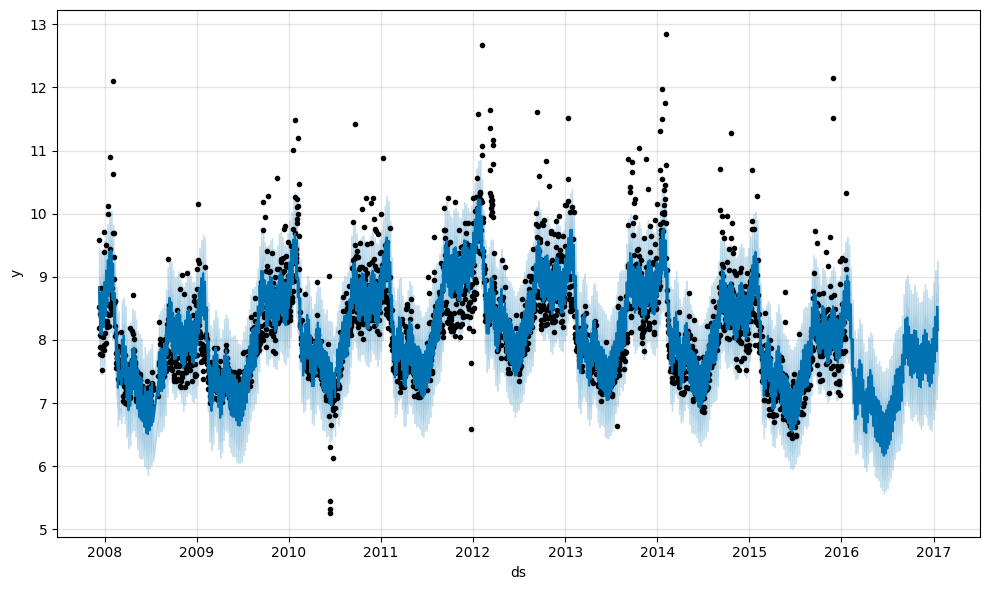

In [9]:
fig1 = m.plot(forecast)

If you want to see the forecast components, you can use the `Prophet.plot_components` method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

/Users/marianfarah/miniconda3/envs/timeseries11/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/marianfarah/miniconda3/envs/timeseries11/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/marianfarah/miniconda3/envs/timeseries11/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a

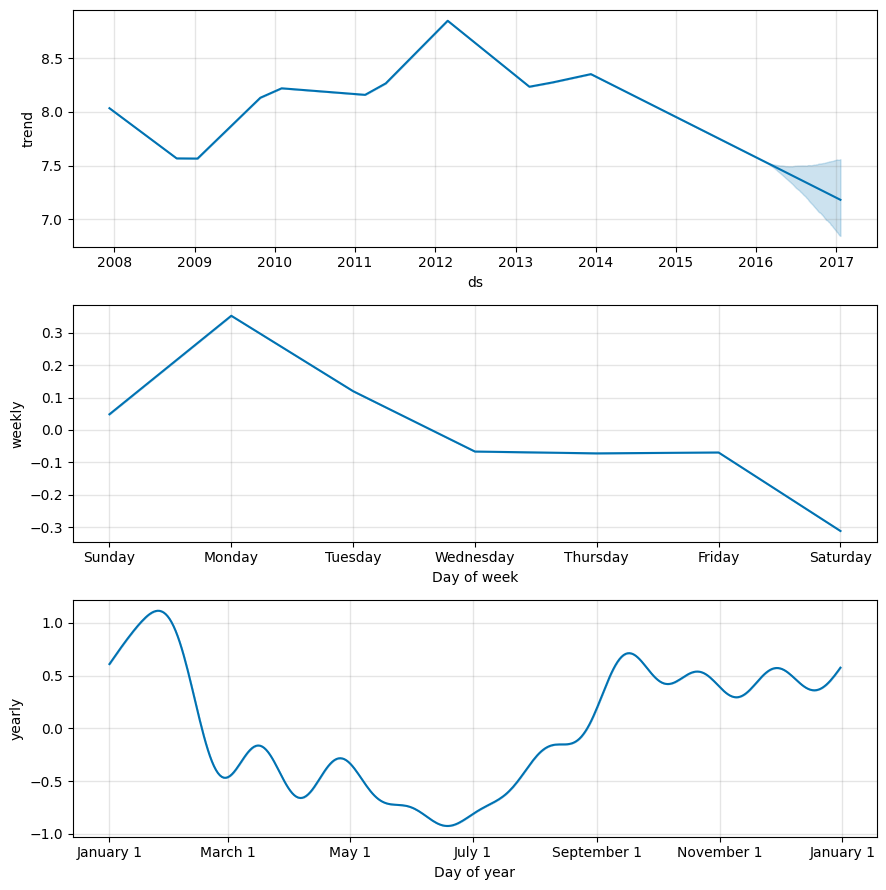

In [10]:
fig2 = m.plot_components(forecast)

In [11]:
from prophet.plot import plot_plotly, plot_components_plotly

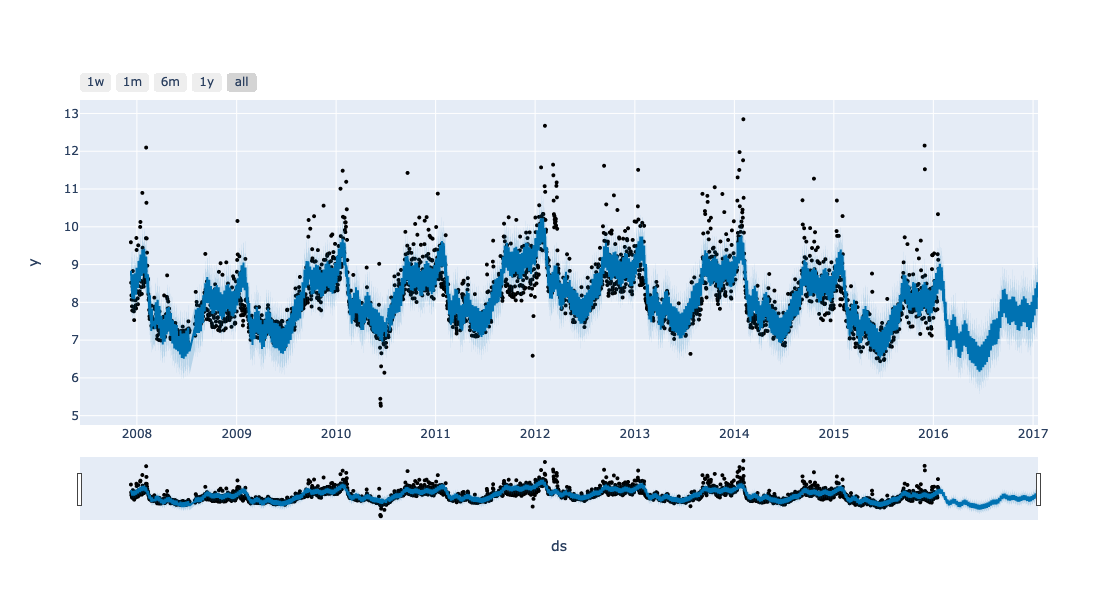

In [12]:
plot_plotly(m, forecast)

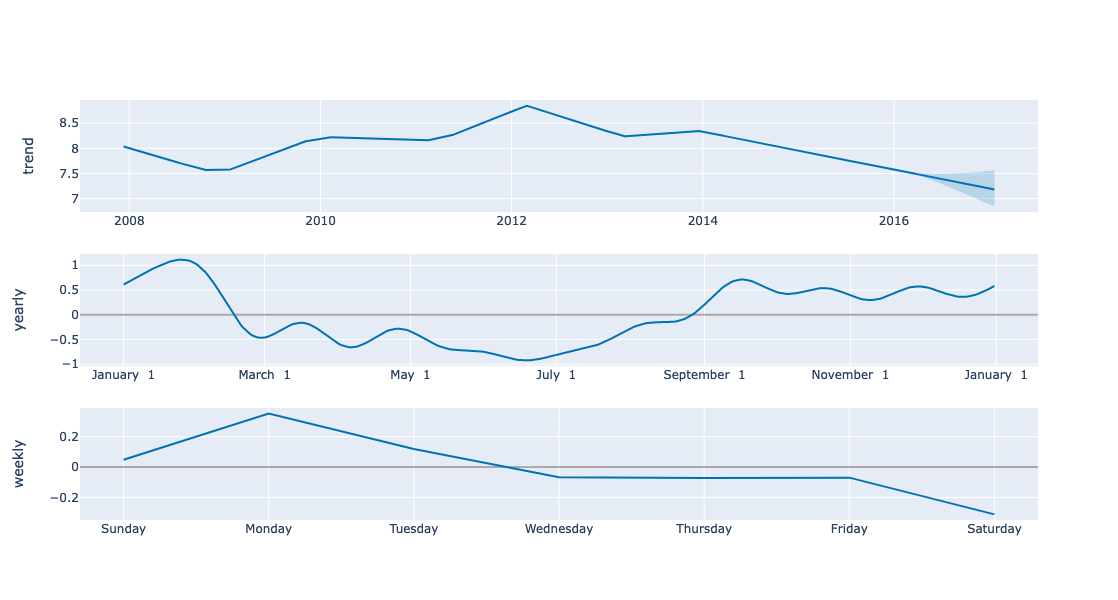

In [13]:
plot_components_plotly(m, forecast)